In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

nsm = pd.read_csv('/Users/chanukaalgama/Desktop/SL_electricity_consumption/data/consumption_data/non_smart_meter/monthly_consumption.csv')
wave_1_houseinfo = pd.read_csv('/Users/chanukaalgama/Desktop/SL_electricity_consumption/data/survey_data/wave_1/w1_household_information_and_history.csv')

### 1. Exploring consumption changes over time to understand any shifts in patterns of usage after the tariff hike in feb 2023

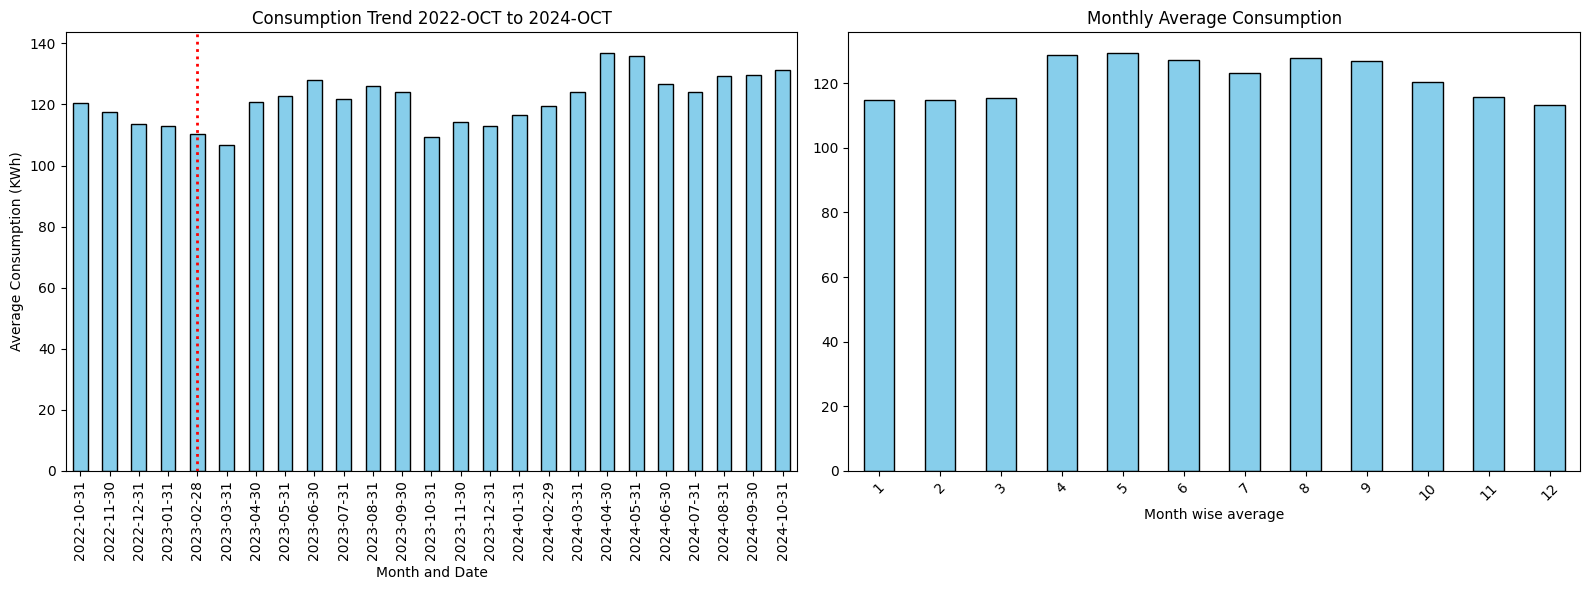

In [18]:
#nsm = nsm.ffill()
nsm['consumption'] = pd.to_numeric(nsm['consumption'], errors='coerce')
nsm['month'] = pd.to_datetime(nsm['month'])
nsm['month_only'] = nsm['month'].dt.month
#vertical line issue - recheck
nsm['month'] = nsm['month'].dt.date

grouped = nsm.groupby('month')['consumption'].mean()
grouped_month = nsm.groupby('month_only')['consumption'].mean()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

grouped.plot(ax=ax[0], kind='bar', color='skyblue', edgecolor='black')
ax[0].set_title("Consumption Trend 2022-OCT to 2024-OCT")
ax[0].set_xlabel('Month and Date')
ax[0].set_ylabel('Average Consumption (KWh)')
highlight_date = pd.to_datetime('2023-02-28').date()
if highlight_date in grouped.index:
    ax[0].axvline(x=grouped.index.get_loc(highlight_date), color='red', linestyle='dotted', linewidth=2)

grouped_month.plot(ax=ax[1], kind='bar', color='skyblue', edgecolor='black')
ax[1].set_title("Monthly Average Consumption")
ax[1].set_xlabel('Month wise average')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 1.1 Since there is no visible pattern to see from the graphs above, We are looking into the different socio economic classes to see if there are any patterns among classes

The socio economic classes are classified considering the education level and the profession of the household head

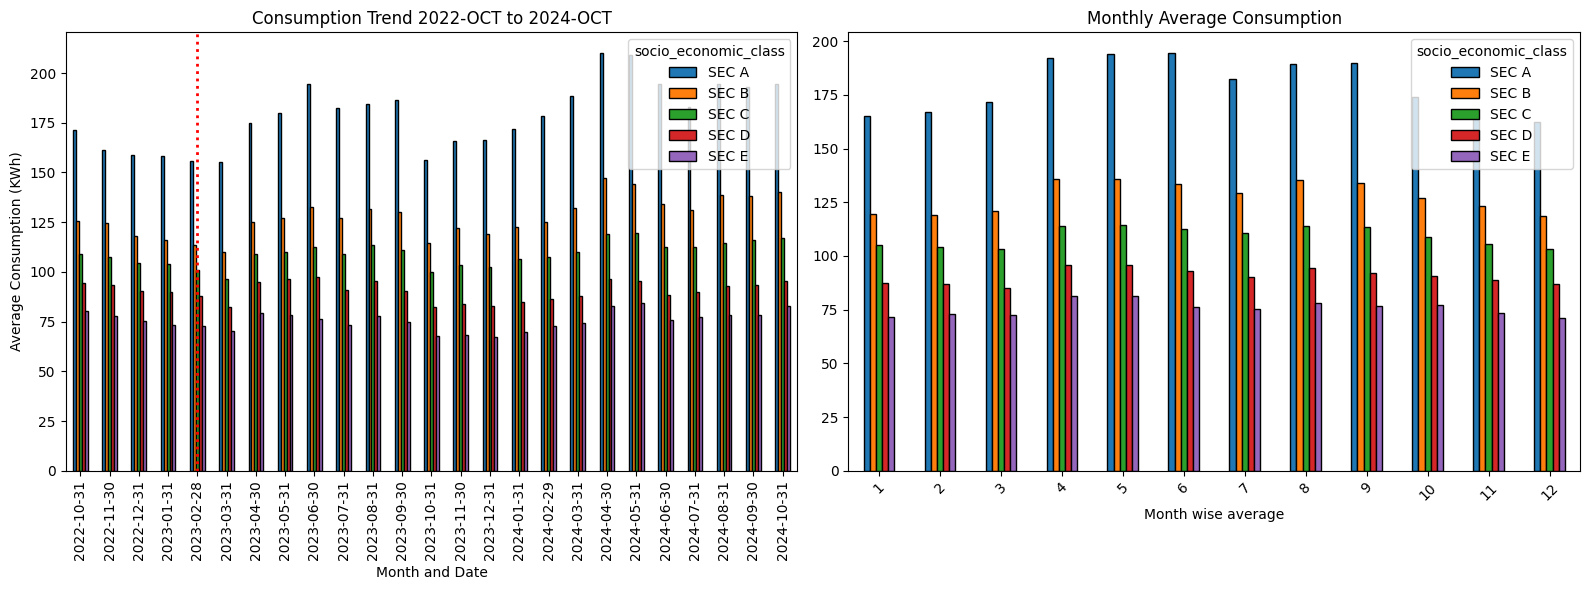

In [19]:
nsm_changed = nsm.merge(
    wave_1_houseinfo[['household_ID', 'socio_economic_class']], 
    on='household_ID', 
    how='inner'
)

grouped = nsm_changed.groupby(['month', 'socio_economic_class'])['consumption'].mean().unstack()
grouped_month = nsm_changed.groupby(['month_only', 'socio_economic_class'])['consumption'].mean().unstack()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

grouped.plot(ax=ax[0], kind='bar', edgecolor='black')
ax[0].set_title("Consumption Trend 2022-OCT to 2024-OCT")
ax[0].set_xlabel('Month and Date')
ax[0].set_ylabel('Average Consumption (KWh)')

highlight_date = pd.to_datetime('2023-02-28').date()
if highlight_date in grouped.index:
    ax[0].axvline(x=grouped.index.get_loc(highlight_date), color='red', linestyle='dotted', linewidth=2)

grouped_month.plot(ax=ax[1], kind='bar', edgecolor='black')
ax[1].set_title("Monthly Average Consumption")
ax[1].set_xlabel('Month wise average')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2 Since the number of people living in the household considered as a direct influence to the electricity consumption, we explored any differences among households by categorizing the households into: extended family, large family, small family and single member households as below

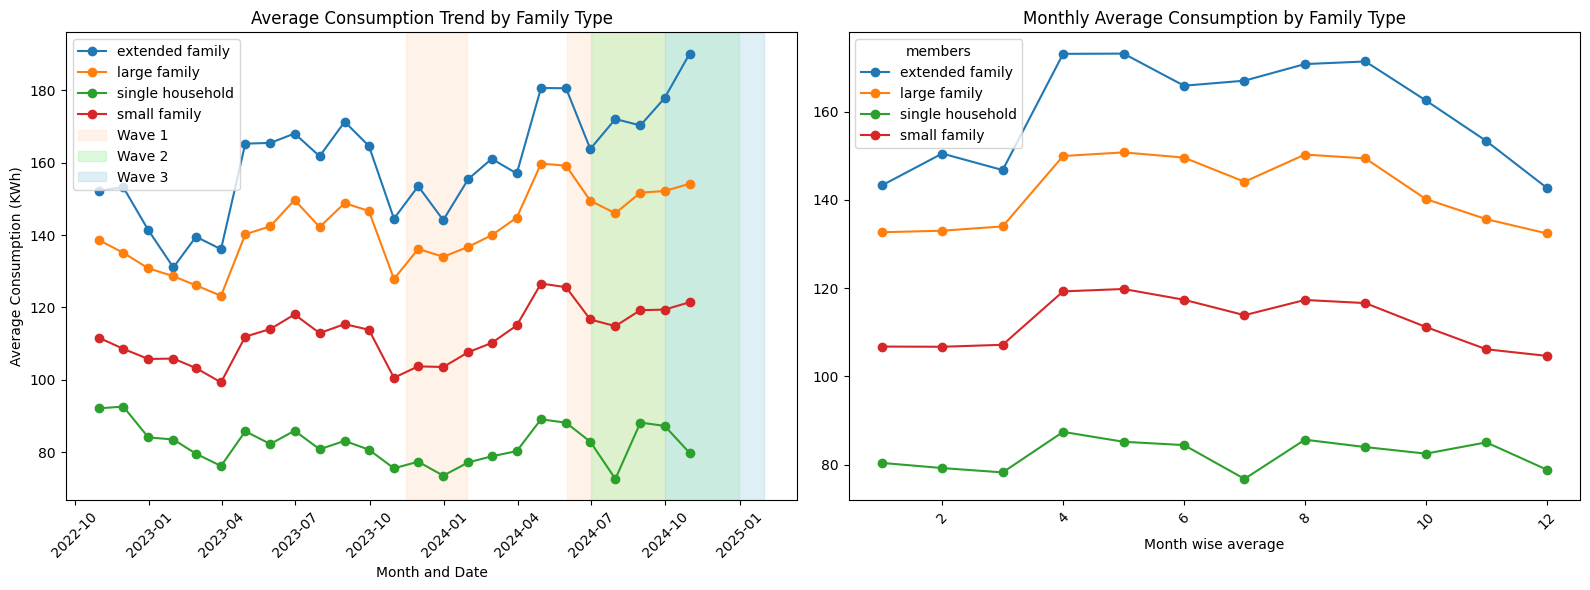

In [20]:
def categorize_family_size(members):
    if members >= 10:
        return 'extended family'
    elif 5 <= members < 10:
        return 'large family'
    elif 2 <= members < 5:
        return 'small family'
    else:
        return 'single household'

wave_1_houseinfo['members'] = wave_1_houseinfo['no_of_household_members'].apply(categorize_family_size)

nsm_changed = nsm.merge(
    wave_1_houseinfo[['household_ID', 'members']], 
    on='household_ID', 
    how='inner'
)

from datetime import datetime

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

grouped = nsm_changed.groupby(['month', 'members'])['consumption'].mean().unstack()
grouped_month = nsm_changed.groupby(['month_only', 'members'])['consumption'].mean().unstack()

grouped.plot(ax=ax[0], kind='line', marker='o')
ax[0].set_title('Average Consumption Trend by Family Type')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('Month and Date')
ax[0].set_ylabel('Average Consumption (KWh)')

grouped_month.plot(ax=ax[1], kind='line', marker='o')
ax[1].set_title('Monthly Average Consumption by Family Type')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel('Month wise average')

wave_1_ranges = [(datetime(2023, 11, 15).date(), datetime(2024, 1, 29).date()),
                 (datetime(2024, 6, 1).date(), datetime(2024, 9, 30).date())]

wave_2_range = (datetime(2024, 7, 1).date(), datetime(2024, 12, 31).date())
wave_3_range = (datetime(2024, 10, 1).date(), datetime(2025, 1, 31).date())

# Wave 1: blue
for start, end in wave_1_ranges:
    ax[0].axvspan(start, end, color='peachpuff', alpha=0.3, label='Wave 1')

# Wave 2en
ax[0].axvspan(wave_2_range[0], wave_2_range[1], color='lightgreen', alpha=0.3, label='Wave 2')

ax[0].axvspan(wave_3_range[0], wave_3_range[1], color='lightblue', alpha=0.4, label='Wave 3')

handles, labels = ax[0].get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax[0].legend(unique.values(), unique.keys())

plt.tight_layout()
plt.show()



#### 2. Exploring the differences in monthly average consumption inbetween the areas of the electricity provider serve

<Figure size 2000x800 with 0 Axes>

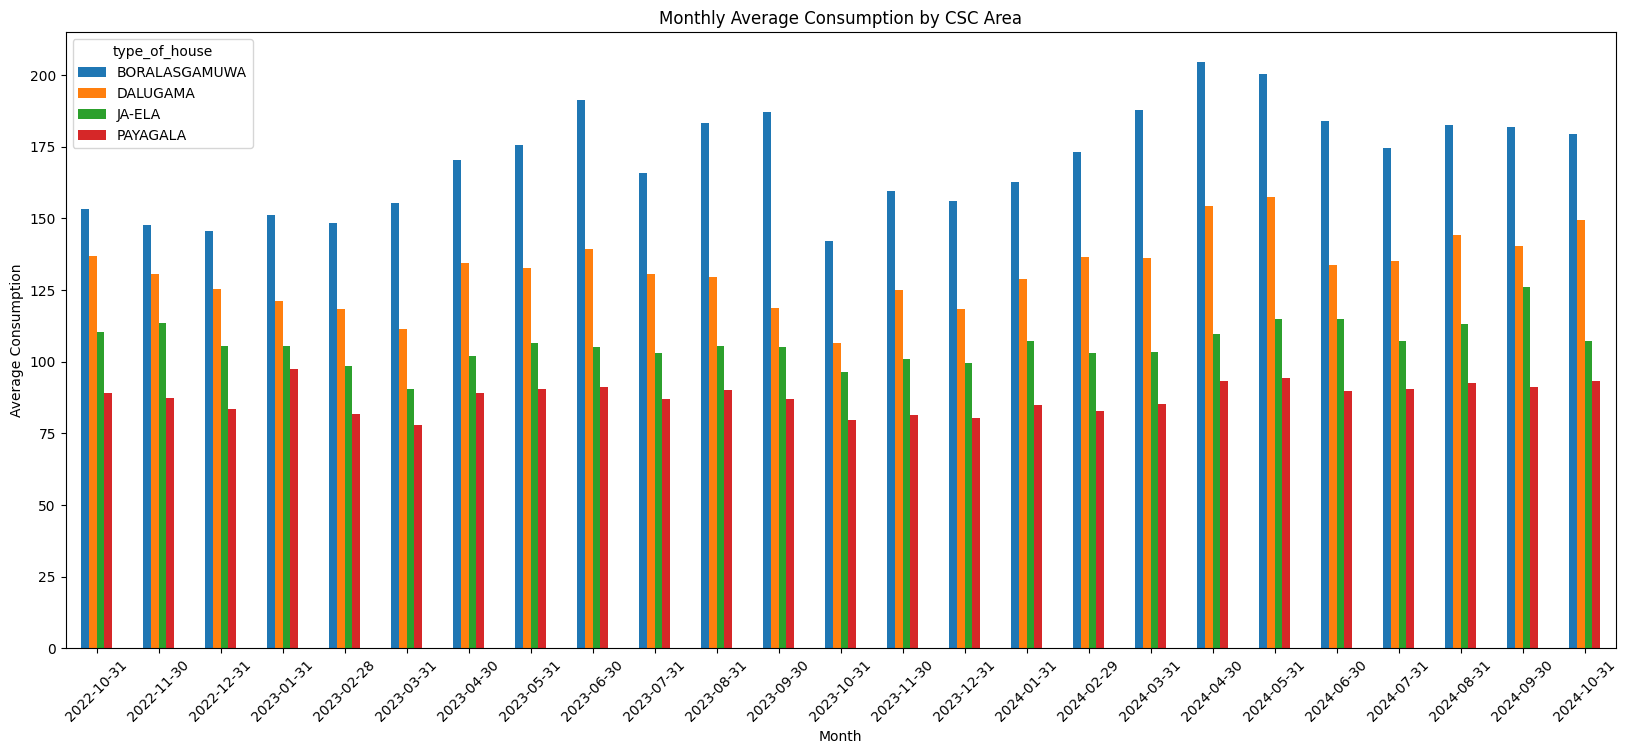

In [21]:
filtered_wave_1_houseinfo = wave_1_houseinfo[wave_1_houseinfo['electricity_provider_csc_area'].isin(['BORALASGAMUWA', 'DALUGAMA', 'JA-ELA', 'PAYAGALA'])]


nsm_changed = nsm.merge(
    filtered_wave_1_houseinfo[['household_ID', 'electricity_provider_csc_area']], 
    on='household_ID', 
    how='inner'
)

grouped = nsm_changed.groupby(['month', 'electricity_provider_csc_area'])['consumption'].mean().unstack()

plt.figure(figsize=(20, 8))
grouped.plot(kind='bar', figsize=(20, 8))

plt.xlabel('Month')
plt.ylabel('Average Consumption')
plt.title('Monthly Average Consumption by CSC Area')
plt.legend(title='type_of_house')
plt.xticks(rotation=45)

plt.show()


In [22]:
'''
Our survey samples were designed to have a good representative of all the areas the electricity provider serve
'''
wave_1_houseinfo.electricity_provider_csc_area.value_counts()

electricity_provider_csc_area
MORATUWA NORTH    533
MORATUWA SOUTH    370
PANADURA          357
GALLE             216
KESELWATTA        206
MAHARAGAMA        202
PAYAGALA          196
KALUTARA          189
HIKKADUWA         163
ALUTHGAMA         158
NEGOMBO           152
MAHARA            139
BORALASGAMUWA     131
PITA-KOTTE        124
DALUGAMA          120
AMBALANGODA       118
KOLONNAWA         115
KOTIKAWATTA       108
JA-ELA            106
KANDANA           105
NUGEGODA           93
SEEDUWA            84
WATTALA            78
Name: count, dtype: int64

building a regressor using the above features to predict consumption

#### 3. Exploring the correlations of electricity consumption with how old the house is

<Figure size 2000x800 with 0 Axes>

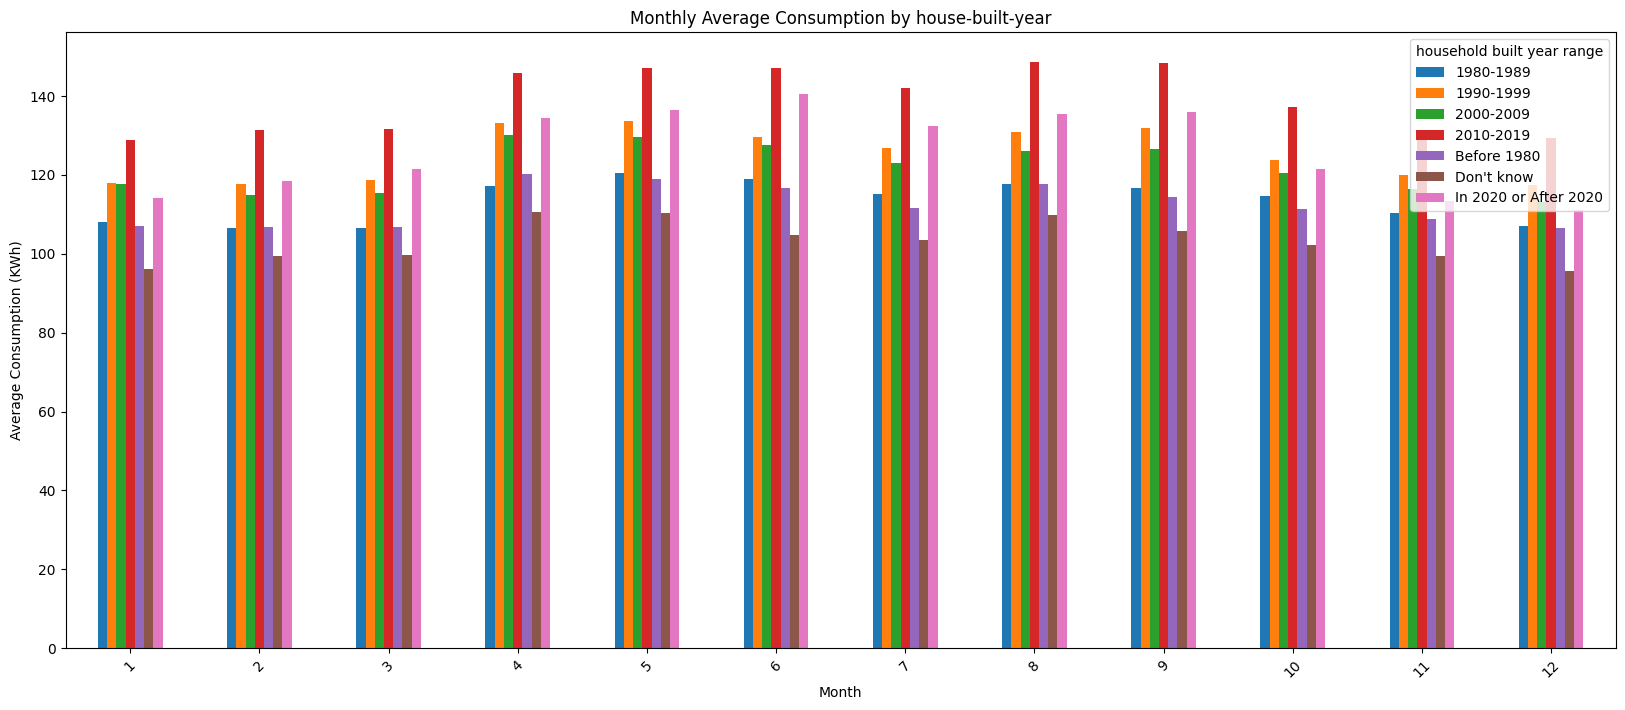

In [23]:
nsm_changed = nsm.merge(
    wave_1_houseinfo[['household_ID', 'built_year_of_the_house']], 
    on='household_ID', 
    how='inner'
)

grouped = nsm_changed.groupby(['month_only', 'built_year_of_the_house'])['consumption'].mean().unstack()

plt.figure(figsize=(20, 8))
grouped.plot(kind='bar', figsize=(20, 8))

plt.xlabel('Month')
plt.ylabel('Average Consumption (KWh)')
plt.title('Monthly Average Consumption by house-built-year')
plt.legend(title='household built year range')
plt.xticks(rotation=45)

plt.show()

#### 4. Exploring the correlations of electricity consumption with the material used fro the walls of the house

<Figure size 2000x800 with 0 Axes>

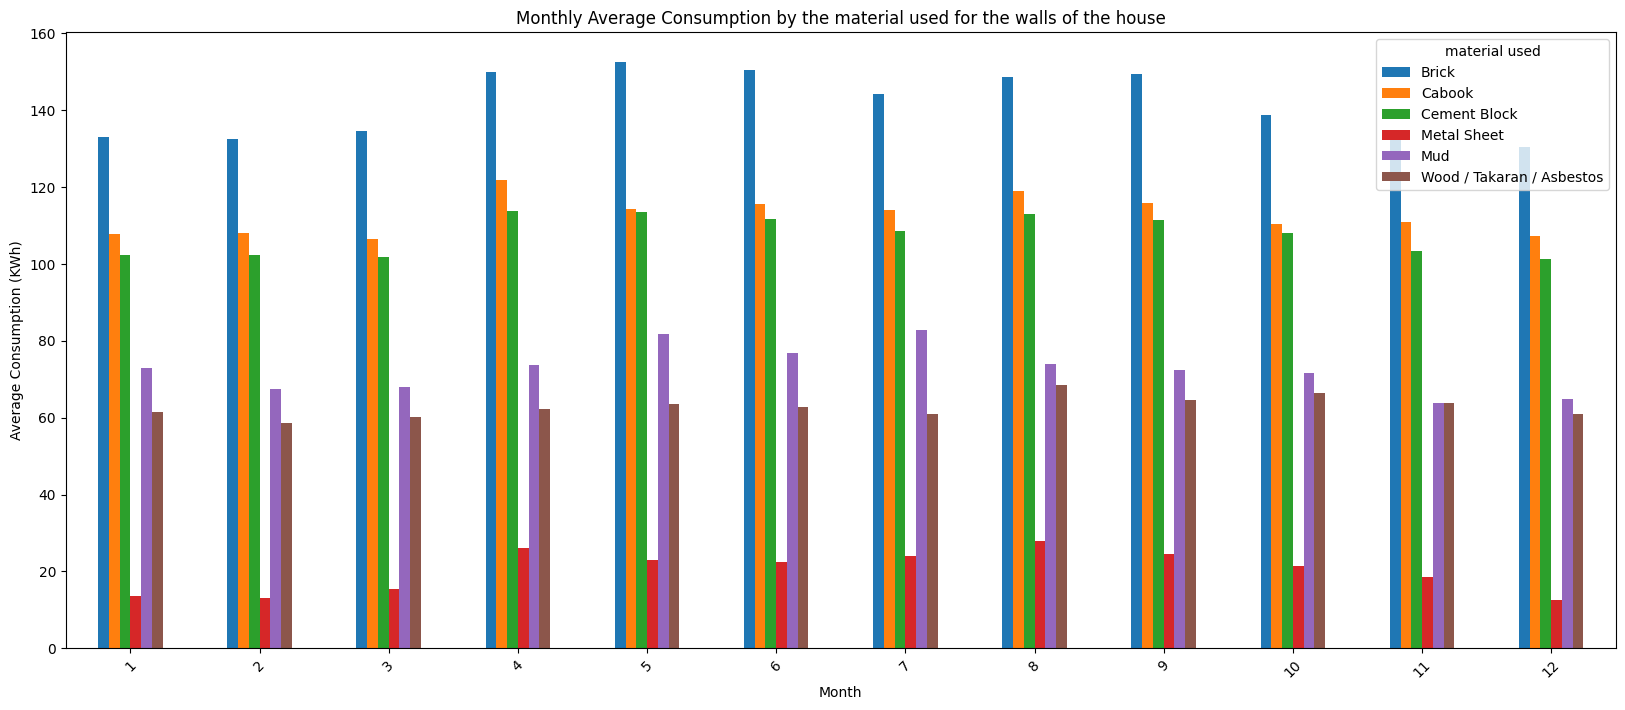

In [24]:
filtered_wave_1_houseinfo = wave_1_houseinfo[wave_1_houseinfo['main_material_used_for_walls_of_the_house'].isin(['Brick', 'Cabook', 'Cement Block', 'Metal Sheet', 'Mud', 'Wood / Takaran / Asbestos'])]


nsm_changed = nsm.merge(
    filtered_wave_1_houseinfo[['household_ID', 'main_material_used_for_walls_of_the_house']], 
    on='household_ID', 
    how='inner'
)
grouped = nsm_changed.groupby(['month_only', 'main_material_used_for_walls_of_the_house'])['consumption'].mean().unstack()

plt.figure(figsize=(20, 8))
grouped.plot(kind='bar', figsize=(20, 8))

plt.xlabel('Month')
plt.ylabel('Average Consumption (KWh)')
plt.title('Monthly Average Consumption by the material used for the walls of the house')
plt.legend(title='material used')
plt.xticks(rotation=45)

plt.show()

#### 5. Exploring the correlations of electricity consumption with the material used for the roof of the house

<Figure size 2000x800 with 0 Axes>

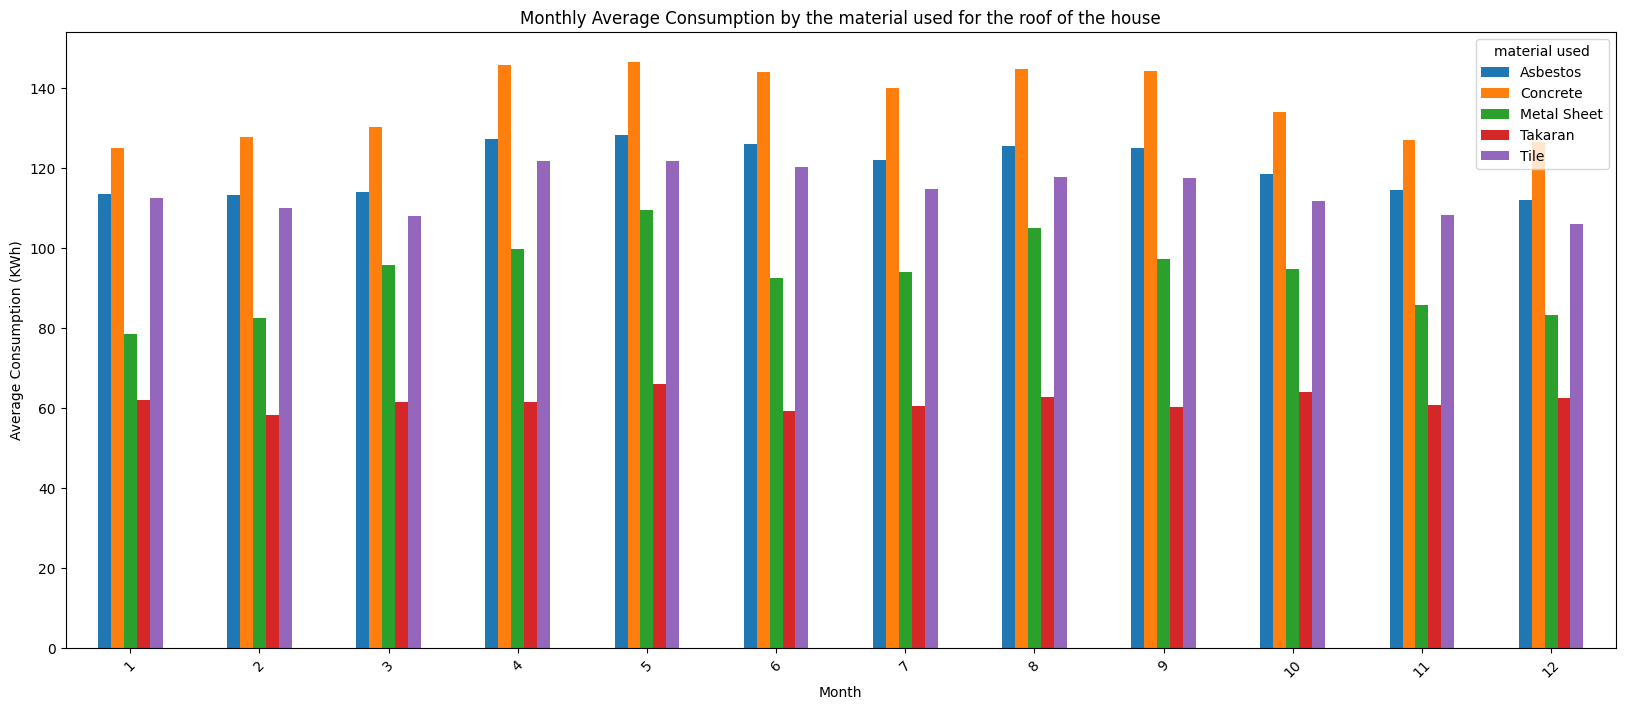

In [25]:
filtered_wave_1_houseinfo = wave_1_houseinfo[wave_1_houseinfo['main_material_used_for_roof_of_the_house'].isin(['Asbestos', 'Concrete', 'Plastic Sheets', 'Metal Sheet', 'Takaran', 'Tile'])]


nsm_changed = nsm.merge(
    filtered_wave_1_houseinfo[['household_ID', 'main_material_used_for_roof_of_the_house']], 
    on='household_ID', 
    how='inner'
)
grouped = nsm_changed.groupby(['month_only', 'main_material_used_for_roof_of_the_house'])['consumption'].mean().unstack()

plt.figure(figsize=(20, 8))
grouped.plot(kind='bar', figsize=(20, 8))

plt.xlabel('Month')
plt.ylabel('Average Consumption (KWh)')
plt.title('Monthly Average Consumption by the material used for the roof of the house')
plt.legend(title='material used')
plt.xticks(rotation=45)

plt.show()

#### 5. Exploring the correlations of electricity consumption with the total monthly expediture for the household

In [26]:
## expenditue description
wave_1_houseinfo['total_monthly_expenditure_of_last_month'].describe()

count      3928.000000
mean      71327.253055
std       44311.381374
min        5000.000000
25%       40000.000000
50%       60000.000000
75%      100000.000000
max      275000.000000
Name: total_monthly_expenditure_of_last_month, dtype: float64

<Figure size 2000x800 with 0 Axes>

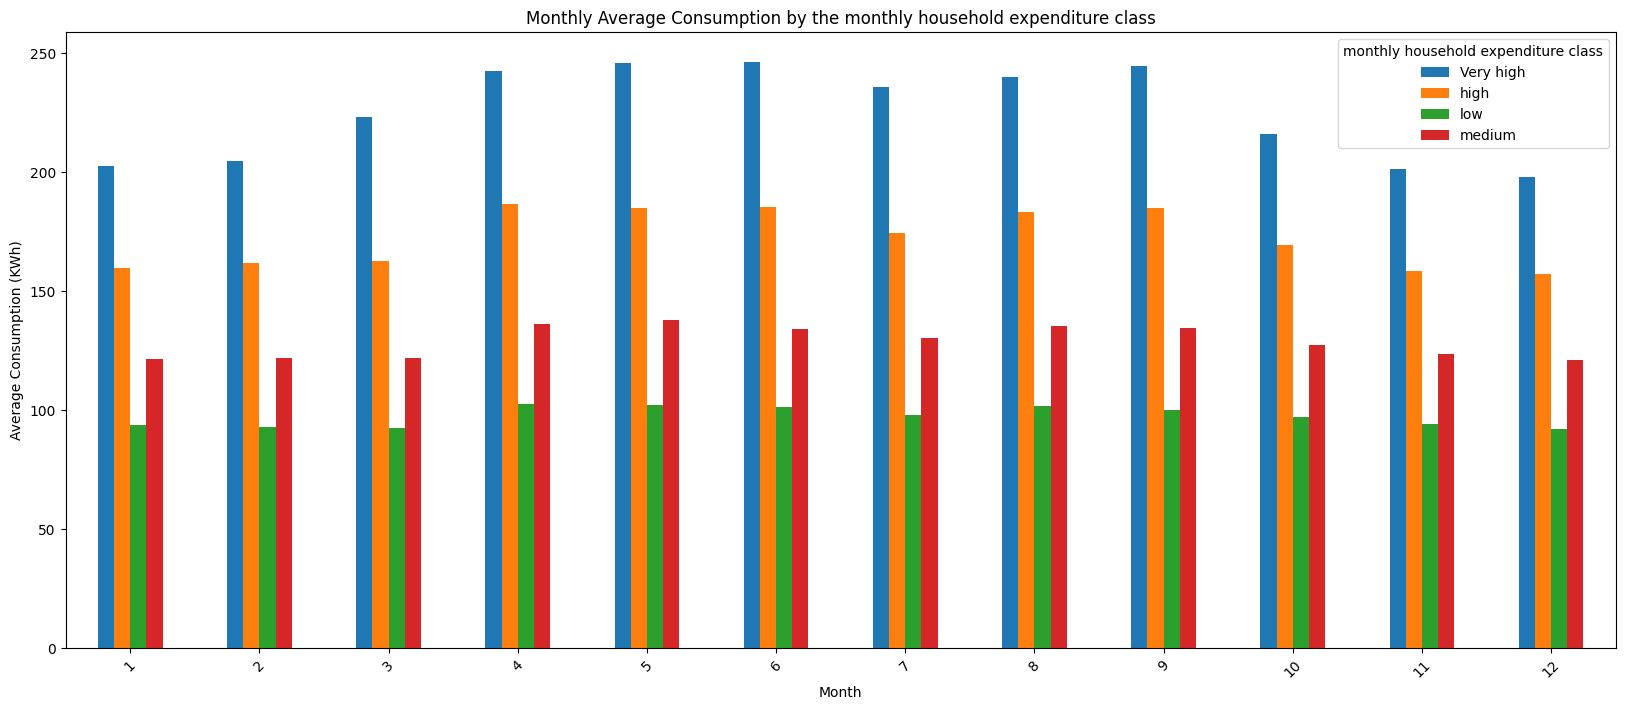

In [27]:
def categorize_expenditure(exp):
    if exp >= 180000:
        return 'Very high'
    elif 120000 <= exp < 180000:
        return 'high'
    elif 60000 <= exp < 120000:
        return 'medium'
    else:
        return 'low'

wave_1_houseinfo['expenditure'] = wave_1_houseinfo['total_monthly_expenditure_of_last_month'].apply(categorize_expenditure)

nsm_changed = nsm.merge(
    wave_1_houseinfo[['household_ID', 'expenditure']], 
    on='household_ID', 
    how='inner'
)

grouped = nsm_changed.groupby(['month_only', 'expenditure'])['consumption'].mean().unstack()

plt.figure(figsize=(20, 8))
grouped.plot(kind='bar', figsize=(20, 8))

plt.xlabel('Month')
plt.ylabel('Average Consumption (KWh)')
plt.title('Monthly Average Consumption by the monthly household expenditure class')
plt.legend(title='monthly household expenditure class')
plt.xticks(rotation=45)

plt.show()